In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_calc = pd.read_csv('../result_5e5_1e6/calc.csv',sep=' ', index_col=False)

In [3]:
# data_calc.N += 1
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,1,1.07748,0.497359,1.18673,4.477490e+05,7.101110e+04,4.477480e+05,7.101080e+04,5.187580e+05
1,500,-149.64900,240.204000,283.00700,4.531860e+10,1.049000e+11,4.531860e+10,1.049000e+11,1.502180e+11
2,1000,30642.10000,85.083500,30642.20000,4.701960e+14,1.208460e+11,4.701950e+14,1.208460e+11,4.703160e+14
3,1500,30668.60000,79.804700,30668.70000,4.702090e+14,1.309420e+11,4.702080e+14,1.309420e+11,4.703390e+14
4,2000,30935.40000,-3706.270000,31156.70000,4.702350e+14,6.971810e+12,4.702340e+14,6.971790e+12,4.772050e+14
...,...,...,...,...,...,...,...,...,...
1995,997500,-317075.00000,-729032.000000,795000.00000,1.083360e+17,1.304620e+17,1.083360e+17,1.304610e+17,2.387970e+17
1996,998000,-320107.00000,-727878.000000,795157.00000,1.083410e+17,1.304620e+17,1.083400e+17,1.304610e+17,2.388020e+17
1997,998500,-319890.00000,-728418.000000,795564.00000,1.083410e+17,1.304620e+17,1.083400e+17,1.304620e+17,2.388020e+17
1998,999000,-318776.00000,-728009.000000,794742.00000,1.083410e+17,1.304620e+17,1.083410e+17,1.304620e+17,2.388030e+17


## Апроксимация

In [35]:
index_end = 2000
index_start = 100
x = np.log10(data_calc['N'][index_start:index_end])
y = np.log10(data_calc['<ΔR^2>'][index_start:index_end])

In [36]:
y

100     16.744535
101     16.744538
102     16.744582
103     16.744613
104     16.744616
          ...    
1995    17.378029
1996    17.378038
1997    17.378038
1998    17.378040
1999    17.378042
Name: <ΔR^2>, Length: 1900, dtype: float64

In [37]:
lg_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
mu = 10**lg_mu
print(f'lg_mu: {lg_mu}, mu: {mu}')

lg_mu: 14.029476700975106, mu: 107022896574116.98


In [38]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
print(f'nu: {nu}')

nu: 0.5412973480242623


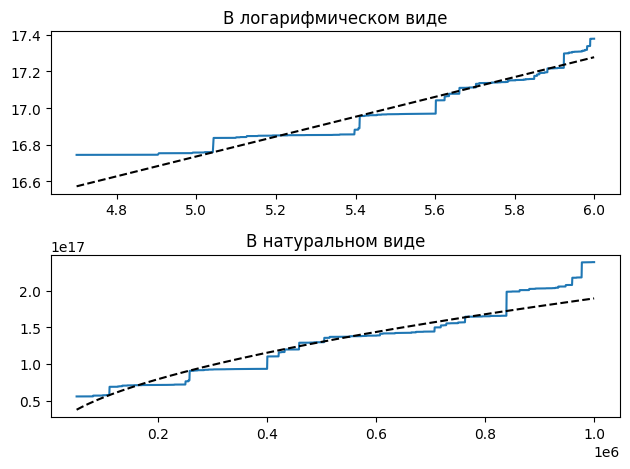

In [40]:
plt.figure()

plt.subplot(2, 1, 1) 

x = np.log10(data_calc['N'][index_start:index_end])
y = np.log10(data_calc['<ΔR^2>'][index_start:index_end])
plt.title('В логарифмическом виде')
plt.plot(x, y)
plt.plot(x, lg_mu + nu * x,'k--', label='Аппроксимация')

plt.subplot(2, 1, 2) 
N_list = data_calc['N'][index_start:index_end]
R2_list = data_calc['<ΔR^2>'][index_start:index_end]
plt.title('В натуральном виде')
plt.plot(N_list, R2_list)
plt.plot(N_list, mu*(N_list**nu),'k--', label='Аппроксимация')

plt.tight_layout() 
plt.show()

In [29]:
data_first_particle = pd.read_csv('../result_new/first_particle.csv',sep=' ', index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: '../result_new/first_particle.csv'

In [171]:
data_first_particle

,x,y
0,0.000000e+00,-2.787590e+00
1,0.000000e+00,9.074600e+00
2,0.000000e+00,4.928220e+00
3,-4.820340e+00,4.928220e+00
4,-5.070020e+00,4.928220e+00
...,...,...
1999994,3.190510e+06,-1.594740e+06
1999995,3.190510e+06,-1.594740e+06
1999996,3.190510e+06,-1.594740e+06
1999997,3.190510e+06,-1.594750e+06


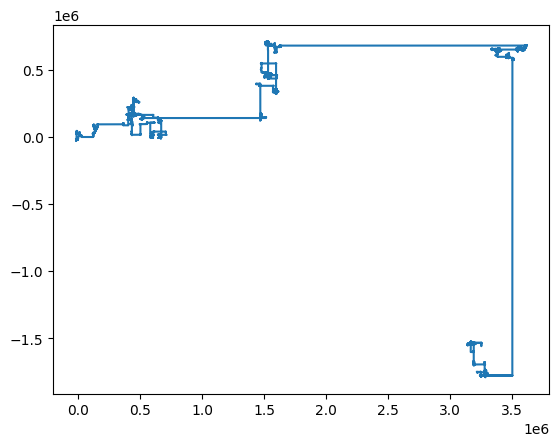

In [172]:
plt.plot(data_first_particle.x,data_first_particle.y)

In [173]:
data_last_vals = pd.read_csv('../result_new/last_vals.csv',sep=' ', index_col=False)

In [174]:
data_last_vals

,x,y
0,3190510.0,-1594750.0
1,4460100.0,19459100.0
2,-1939400.0,-682322.0
3,1650350.0,-7355390.0
4,7269010.0,-3637330.0
...,...,...
149995,-2608940.0,-1095690.0
149996,1742090.0,1160570.0
149997,-9898000.0,3091490.0
149998,22980800.0,3153010.0


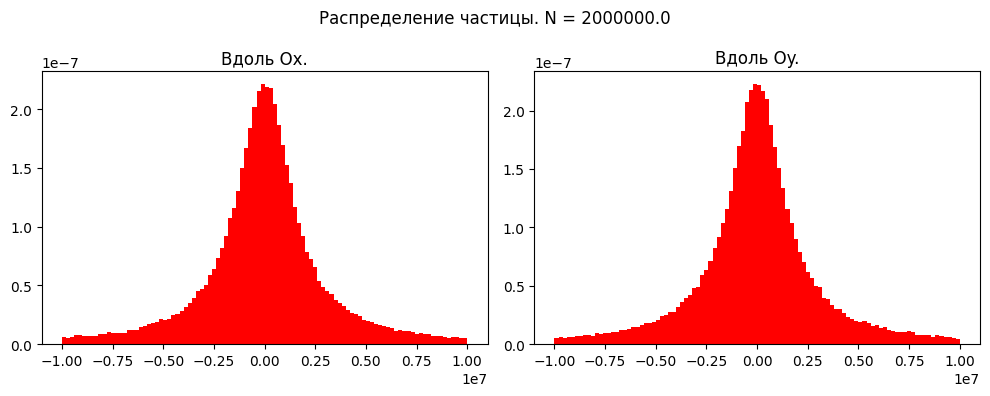

In [175]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частицы. N = {2e6}')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()